In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

%matplotlib inline 

# Cleaning and Sifting Titanic Data

In [6]:
titanic = pd.read_csv('../datasets/train.csv')

## At-A-Glance of the Data

In [7]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**One of the first things to do when initially looking at a data framework is to check how much of the date is complete, how much is missing and any possible errors.**

In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
nul_titanic = titanic.isnull().sum()

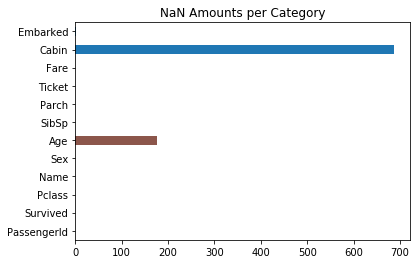

In [10]:
nul_titanic.plot(kind='barh', title = 'NaN Amounts per Category');

In [11]:
pie_labels = "Age", "Cabin", "Embarked"
pie_colors = ['brown', 'skyblue', 'green']
pie_sizes = ['177', '687', '2']

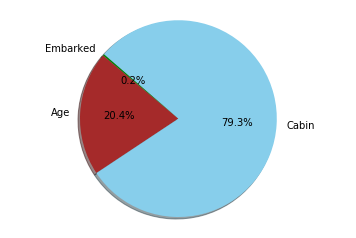

In [12]:
plt.pie(pie_sizes, labels=pie_labels, colors=pie_colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

**As for the visualization above, there is a lot of information missing from the Cabin feature.  My hypothesis to this there were a lot of unregistered passengers.  Either stowaways or people who traded tickets so their cabin didn't match their name.  The stowaway possibility could also account for the missing ages.**

In [13]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
print(titanic.shape)

(891, 12)


**Looks like there are 2 missing values in the data.  This is pretty insignificant in my opinion.  The amount is small and the feature is relatively unimportant.  Removing the values would not tilt, sway or influence the data significantly**

In [15]:
titanic.dropna(axis=0, how='any',subset=['Embarked'], inplace = True)

**It is important to always check your data.  Despite the line of code with ```titanic.Embarked.isnull().sum()``` that shows a value of zero null values, the line ```titanic.isnull().sum()``` shows still a value of two**

In [16]:
titanic.Embarked.isnull().sum()

0

In [17]:
print(titanic.shape)

(889, 12)


In [18]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

**Furthermore we can see of the 891 rows, ```Cabin``` feature has 687 missing values.  In other words, just about 77% of the data in the feature is missing information.  This would be an ideal feature to remove as well to clean up the data.**

In [19]:
titanic.Cabin.isnull().sum()

687

In [20]:
titanic.drop(columns = 'Cabin', inplace = True)

In [21]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**After taking a look at the pandas dataframe, I noticed there are some easy breakdowns of columns.  For example, breaking down ```Sex```, ```Embarked``` and ```Pclass```.**

In [23]:
pd.get_dummies(titanic.Embarked, prefix = 'Embarked_Class').head()

,Embarked_Class_C,Embarked_Class_Q,Embarked_Class_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [24]:
unpack_emb = pd.get_dummies(titanic.Embarked, prefix = 'Embarked_Class')

In [25]:
titanic = pd.concat([titanic, unpack_emb], axis=1)

In [26]:
titanic.drop(columns='Embarked', inplace=True)

In [27]:
pd.get_dummies(titanic.Sex, prefix = 'Gender').head()

,Gender_female,Gender_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Class_C,Embarked_Class_Q,Embarked_Class_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,0,1


**Now I can start diving into some of the exploratory statistics once I have the information broken down.  Of course there will be new avenues that come up to explore, this is a good starting spot**

In [29]:
survived = titanic['Survived'].sum()

In [30]:
titanic.shape

(889, 13)

In [31]:
surv_rate = survived/titanic.shape[0]

In [32]:
surv_rate

0.38245219347581555

**Here we can see that only 38% of the passengers survived the Titanic sinking**

In [33]:
gender = pd.get_dummies(titanic.Sex, prefix = 'Gender')

In [34]:
titanic['Male'] = gender.Gender_male

In [35]:
titanic['Female'] = gender.Gender_female

In [36]:
titanic['Female'].sum()

312

In [37]:
titanic['Male'].sum()

577

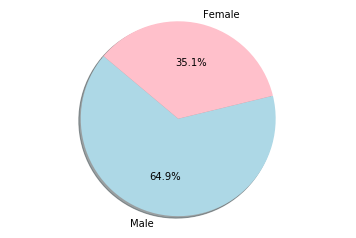

In [38]:
pie_labels = "Male", "Female"
pie_colors = ['lightblue', 'pink']
pie_sizes = ['577', '312']

plt.pie(pie_sizes, labels=pie_labels, colors=pie_colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

**Above we can see the representation of the population in terms of gender**

In [39]:
survived_df = titanic.loc[titanic['Survived'] == 1]

In [40]:
survived_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Class_C,Embarked_Class_Q,Embarked_Class_S,Male,Female
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,0,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,0,1,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,1,0,0,0,1


In [41]:
survived_df.shape

(340, 15)

In [42]:
survived_df.Age.isnull().sum()

52

**Looking at the missing information with the newly vetted data shows a yellow flag.  Roughly 1/7th of the data on the survived passengers' Age dataframe is missing.**

In [43]:
survived_df.Age.mean()

28.19329861111111

In [44]:
survived_df.Age.median()

28.0

**It appears that both the mean and median surviving age is around 28 years-old.  In further analysis, this would be information I put into Tableau to visually represent the distribution of surviving ages, genders, classes, etc.**

In [45]:
survived_male = survived_df.loc[survived_df['Female'] == 0]

In [46]:
survived_male.shape

(109, 15)

In [47]:
survived_female = survived_df.loc[survived_df['Female'] == 1]

In [48]:
survived_female.shape

(231, 15)

In [49]:
survived_female.shape[0]/survived_male.shape[0]

2.1192660550458715

**Here I can see the ratio of men to women who survived.  It would prove that "Women and children first", that women were respected and survived over men.**

**Now, after seeing the survival rates of genders, I want to take a closer look at surviving based on socio-economic standards and the ages who survived more frequently.**

In [50]:
survived_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Class_C,Embarked_Class_Q,Embarked_Class_S,Male,Female
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,1,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,0,0,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,0,0,1,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,1,0,0,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,0,0,1,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,0,0,1,0,1
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,0,0,1,0,1
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,0,0,1,1,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,1,0,0,0,1


In [51]:
pclass = pd.get_dummies(survived_df.Pclass, prefix = 'Class')

In [52]:
pclass

,Class_1,Class_2,Class_3
1,1,0,0
2,0,0,1
3,1,0,0
8,0,0,1
9,0,1,0
10,0,0,1
11,1,0,0
15,0,1,0
17,0,1,0
19,0,0,1


In [53]:
class1 = pclass['Class_1'].sum()

In [54]:
class2 = pclass['Class_2'].sum()

In [55]:
class3 = pclass['Class_3'].sum()

In [56]:
class1

134

In [57]:
class2

87

In [58]:
class3

119

**It looks like passenger classes 3 and 1 had the highest survival rating whereas class 2 had the least.**

In [59]:
pclassall = pd.get_dummies(titanic.Pclass, prefix = 'Class')

In [60]:
pclassall

,Class_1,Class_2,Class_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,0,1
6,1,0,0
7,0,0,1
8,0,0,1
9,0,1,0


In [61]:
class1all = pclassall.Class_1.sum()
class2all = pclassall.Class_2.sum()
class3all = pclassall.Class_3.sum()

In [62]:
class1all

214

In [63]:
class2all

184

In [64]:
class3all

491

**It wasn't enough to see how many of the classes survived, so here is a breakdown of total classes.  Now we can see the percentage of each passenger class surviving.**

In [65]:
class1/class1all

0.6261682242990654

In [66]:
class2/class2all

0.47282608695652173

In [67]:
class3/class3all

0.24236252545824846

**Interestingly enough, more than half of passenger class 1 survived while less than a quarter of passenger class 3 survived.  This could be an indication of class 1 being of higher 'importance' and higher social standing.**

In [68]:
survived_df.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                 52
SibSp                0
Parch                0
Ticket               0
Fare                 0
Embarked_Class_C     0
Embarked_Class_Q     0
Embarked_Class_S     0
Male                 0
Female               0
dtype: int64

In [69]:
survived_df.Age.fillna('Age-Null', inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [70]:
len(survived_df.Age)

340

In [71]:
survivedages = survived_df.loc[survived_df.Age != 'Age-Null',:]

In [72]:
len(survivedages)

288

**Now I've cleaned the ages and it looks like I was able to responsibly remove the 52 ```Null``` values which the survivedages DF only provides actual ages.  Now I can look at segments of ages to see which groups survived.  Was it true that "women and children first" applied to the Titanic's tragic evacuation.  We already saw that many of them women survived over the men.**

In [73]:
child = survivedages.loc[survivedages.Age < 13,:]

In [74]:
len(child)

40

In [75]:
young_adult = survivedages.query('13 <= Age <= 24')

In [76]:
len(young_adult)

78

In [77]:
adult = survivedages.query('25 <= Age <= 64')

In [78]:
len(adult)

169

In [79]:
senior = survivedages.loc[survivedages.Age > 64,:]

In [80]:
len(senior)

1

**Now we have the actual groupings of ages who survived.  What's interesting is the amount of adults and young adults who survived, but even more, than one 'Senior' survived.  At this point I am going to see what the ratio/percentage of survived to not survived and check out any significance.**

In [81]:
childall = titanic.loc[titanic.Age < 13,:]

In [82]:
len(childall)

69

In [83]:
len(child)/len(childall)

0.5797101449275363

In [84]:
young_adultall = titanic.query('13 <= Age <= 24')

In [85]:
len(young_adultall)

208

In [86]:
len(young_adult)/len(young_adultall)

0.375

In [87]:
adultall = titanic.query('25 <= Age <= 64')

In [88]:
len(adultall)

423

In [89]:
len(adult)/len(adultall)

0.39952718676122934

In [90]:
seniorall = titanic.loc[titanic.Age > 64,:]

In [91]:
len(seniorall)

11

In [92]:
len(senior)/len(seniorall)

0.09090909090909091

**Over half of the children survived the Titanic whereas the "Young Adults" and "Adults had just over 1/3 of a rate of surviving.  This goes to show that in spite of a few hours of panic as the Titanic was sinking, the passengers did in fact honor "Women and Children First".  Take that Billy Zane.**